In [ ]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from hmmlearn import hmm

In [6]:
cryptos = ["BTC-USD", "ETH-USD", "BNB-USD", "SOL-USD", "XRP-USD", 
           "ADA-USD", "DOGE-USD", "AVAX-USD", "DOT-USD", "LINK-USD",
           "MATIC-USD", "SHIB-USD", "LTC-USD", "BCH-USD", "UNI-USD"]

# Obtener solo precios de cierre del último año
close_prices = pd.DataFrame()

for crypto in cryptos:
    try:
        data = yf.download(crypto, period="1y", progress=False)
        close_prices[crypto] = data['Close']
        print(f"✅ {crypto}")
    except:
        print(f"❌ Error con {crypto}")

print(f"\n📊 Datos obtenidos: {close_prices.shape}")
print(close_prices.head())

C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ BTC-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ ETH-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ BNB-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ SOL-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ XRP-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ ADA-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ DOGE-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ AVAX-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ DOT-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ LINK-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ MATIC-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ SHIB-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ LTC-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ BCH-USD


C:\Users\Fernando Flores\AppData\Local\Temp\ipykernel_8996\140246510.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(crypto, period="1y", progress=False)


✅ UNI-USD

📊 Datos obtenidos: (366, 15)
                 BTC-USD      ETH-USD     BNB-USD     SOL-USD   XRP-USD  \
Date                                                                      
2024-11-17  89845.851562  3075.661621  618.400085  237.575531  1.054335   
2024-11-18  90542.640625  3207.856445  619.435486  239.794250  1.117936   
2024-11-19  92343.789062  3111.384033  615.987427  238.097549  1.101947   
2024-11-20  94339.492188  3072.187988  606.117493  235.423660  1.102301   
2024-11-21  98504.726562  3361.053955  622.826355  257.065887  1.250352   

             ADA-USD  DOGE-USD   AVAX-USD   DOT-USD   LINK-USD  MATIC-USD  \
Date                                                                        
2024-11-17  0.702325  0.366560  34.738087  5.416034  13.778284   0.398674   
2024-11-18  0.734580  0.371741  35.448456  6.006414  15.220886   0.454328   
2024-11-19  0.739642  0.391356  34.274109  5.805377  14.646310   0.432971   
2024-11-20  0.800345  0.377497  33.585712  5.7168

In [7]:
print(close_prices.tail())

                 BTC-USD      ETH-USD     BNB-USD     SOL-USD   XRP-USD  \
Date                                                                      
2025-11-13  99697.492188  3232.757080  928.046631  145.108475  2.331140   
2025-11-14  94397.789062  3103.785645  915.309265  138.676605  2.243982   
2025-11-15  95549.148438  3166.631348  932.201904  139.535202  2.235246   
2025-11-16  94177.078125  3092.847412  927.257874  137.265732  2.216609   
2025-11-17  94059.695312  3129.056396  918.976379  139.769699  2.228519   

             ADA-USD  DOGE-USD   AVAX-USD   DOT-USD   LINK-USD  MATIC-USD  \
Date                                                                        
2025-11-13  0.531115  0.164296  16.161346  2.861380  14.584553        NaN   
2025-11-14  0.498420  0.157466  15.110730  2.809766  13.800078        NaN   
2025-11-15  0.503400  0.163137  15.524423  2.831318  14.120943        NaN   
2025-11-16  0.484845  0.158661  15.158035  2.787378  13.741969        NaN   
2025-11-17  

In [8]:
corr= close_prices.corr()
print(corr)

            BTC-USD   ETH-USD   BNB-USD   SOL-USD   XRP-USD   ADA-USD  \
BTC-USD    1.000000  0.747418  0.645517  0.465690  0.646495  0.121137   
ETH-USD    0.747418  1.000000  0.755086  0.748572  0.566919  0.469209   
BNB-USD    0.645517  0.755086  1.000000  0.399615  0.411269 -0.020357   
SOL-USD    0.465690  0.748572  0.399615  1.000000  0.342484  0.733303   
XRP-USD    0.646495  0.566919  0.411269  0.342484  1.000000  0.330730   
ADA-USD    0.121137  0.469209 -0.020357  0.733303  0.330730  1.000000   
DOGE-USD   0.042237  0.425991 -0.040631  0.804933  0.063508  0.879953   
AVAX-USD   0.031478  0.426940 -0.013756  0.762829  0.063571  0.890713   
DOT-USD   -0.214780  0.148272 -0.291385  0.550853 -0.110668  0.836684   
LINK-USD   0.424170  0.774479  0.375809  0.811043  0.579931  0.792722   
MATIC-USD  0.650604  0.958006  0.756566  0.775229 -0.103800  0.863132   
SHIB-USD  -0.196797  0.151343 -0.308750  0.572481 -0.151244  0.805055   
LTC-USD    0.388743  0.633542  0.274308  0.639800  

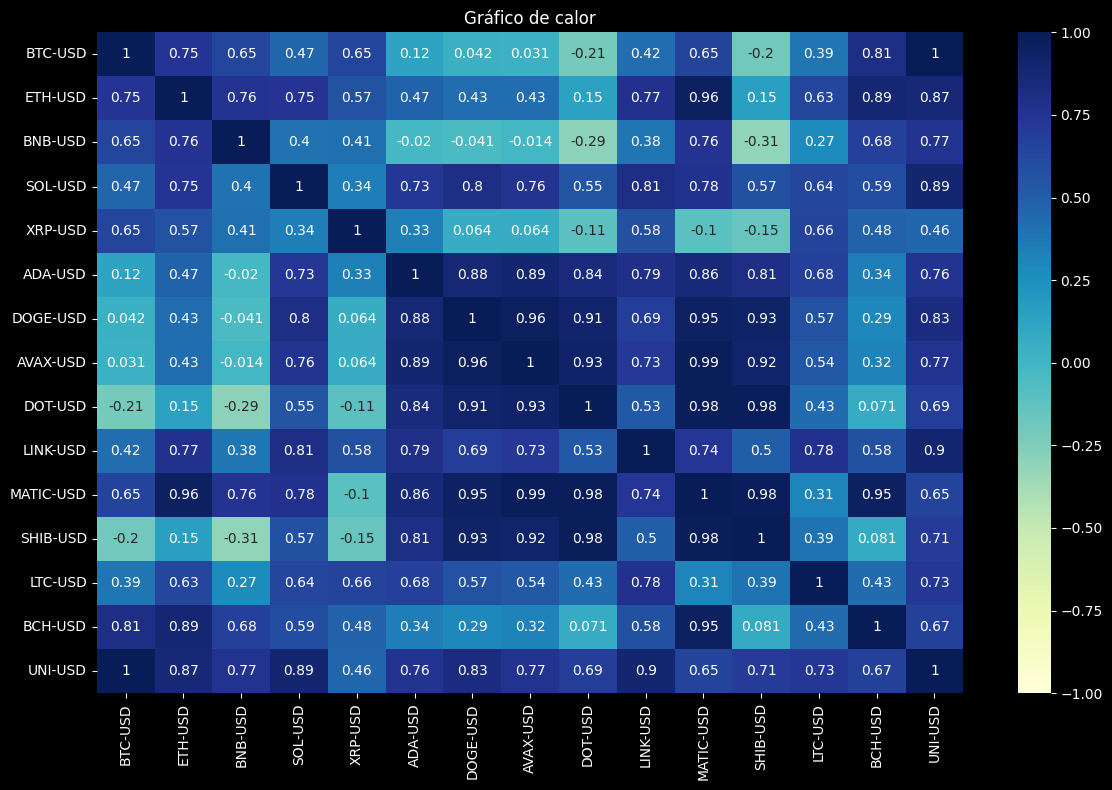

In [11]:
# PRIMERO configurar el estilo y tamaño
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))  # ¡ESTA LÍNEA ES CLAVE!

# LUEGO crear el heatmap
sns.heatmap(corr, annot=True, cmap="YlGnBu", vmax=1, vmin=-1)
plt.title("Gráfico de calor")
plt.tight_layout()
plt.show()

In [21]:
ticker =yf.Ticker("BTC-USD")
btc_histl = ticker.history(start="2023-06-11", 
end="2025-11-17", )
print(btc_histl.head())




                                   Open          High           Low  \
Date                                                                  
2023-06-11 00:00:00+00:00  25854.031250  26203.439453  25668.986328   
2023-06-12 00:00:00+00:00  25934.285156  26087.919922  25675.197266   
2023-06-13 00:00:00+00:00  25902.941406  26376.351562  25728.365234   
2023-06-14 00:00:00+00:00  25920.257812  26041.800781  24902.152344   
2023-06-15 00:00:00+00:00  25121.673828  25735.308594  24797.167969   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2023-06-11 00:00:00+00:00  25940.167969  10732609603        0.0           0.0  
2023-06-12 00:00:00+00:00  25902.500000  11677889997        0.0           0.0  
2023-06-13 00:00:00+00:00  25918.728516  14143474486        0.0           0.0  
2023-06-14 00:00:00+00:00  25124.675781  14265717766        0.0           0.0  
2023-06-15 00:00:00+00

In [22]:

# Calcular retornos logarítmicos de tu data
returns = np.log(btc_histl['Close'] / btc_histl['Close'].shift(1)).dropna().values.reshape(-1, 1)

# Crear y entrenar el modelo Markov Switching
model = hmm.GaussianHMM(
    n_components=2,           # 2 regímenes
    covariance_type="full", 
    n_iter=1000,
    random_state=42
)
model.fit(returns)
regime_states = model.predict(returns)

<Figure size 1500x1000 with 0 Axes>

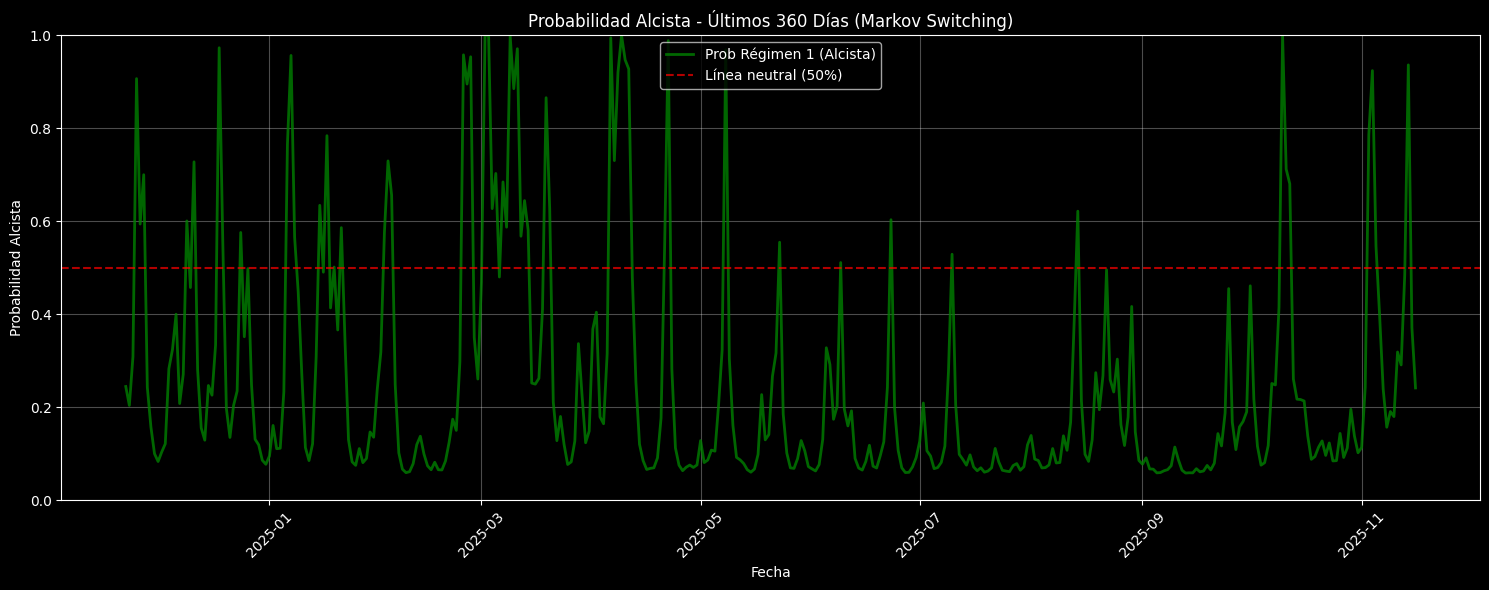

In [26]:
# Obtener soft probabilities (probabilidades de cada régimen)
soft_probs = model.predict_proba(returns)

# Gráfico de probabilidades suaves
plt.figure(figsize=(15, 10))

# Gráfico: Probabilidad alcista últimos 360 días
plt.figure(figsize=(15, 6))

# Tomar últimos 360 observaciones
last_360_days = btc_histl.index[1:][-360:]
last_360_probs = soft_probs[:, 1][-360:]

plt.plot(last_360_days, last_360_probs, 'g-', label='Prob Régimen 1 (Alcista)', alpha=0.8, linewidth=2)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.7, label='Línea neutral (50%)')

plt.title('Probabilidad Alcista - Últimos 360 Días (Markov Switching)')
plt.ylabel('Probabilidad Alcista')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# Rotar fechas para mejor visualización
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

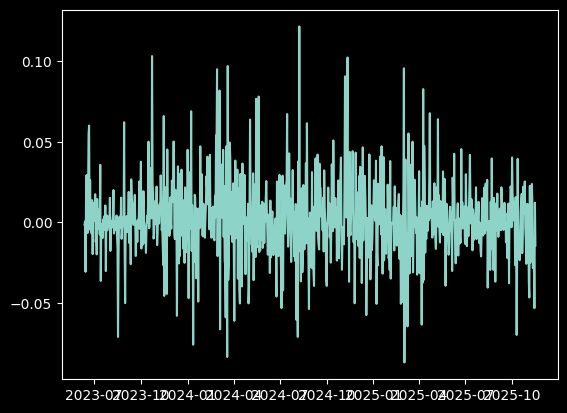

In [79]:
btc_histl["return"]= btc_histl["Close"].pct_change()

plt.plot(btc_histl["return"])

In [81]:

mu = btc_histl["return"].mean()
sigma = btc_histl["return"].std()
S0 = btc_histl["Close"].iloc[-1]
dias = len(btc_histl)
print("Mean:", mu)
print("Standard Deviation:", sigma)
print("Last Adjusted Close Price:", S0)
n=dias
T=2.43
dt=T/n
M= 1000
mu = (1+mu)**365 -1
sigma = sigma*np.sqrt(365)
print("Mean:", mu)
print("Standard Deviation:", sigma)
print("Last Adjusted Close Price:", S0)
print("dia", dt)
print("dias", dias)

Mean: 0.0017461770388653704
Standard Deviation: 0.024384913284041212
Last Adjusted Close Price: 94177.078125
Mean: 0.8904195699768498
Standard Deviation: 0.4658731141551597
Last Adjusted Close Price: 94177.078125
dia 0.0027303370786516856
dias 890


In [82]:
St = np.exp((mu-1/2*sigma**2)*dt 
            +sigma*np.random.normal(0, np.sqrt(dt), (M,365)).T)
print(St)

St= np.vstack([np.ones(M), St])

St = S0* St.cumprod(axis=0)

[[1.0027552  1.02966633 1.00816845 ... 1.00426519 1.01533603 1.01239087]
 [1.01382835 0.99346259 0.98484168 ... 0.98485527 1.02506677 1.02673692]
 [1.06969047 0.98611096 0.98058929 ... 1.00620786 1.03996363 1.038685  ]
 ...
 [1.00184203 0.9731272  0.99827616 ... 0.98585842 1.00981871 0.98981581]
 [0.99905139 0.97523028 0.99224692 ... 1.06228917 1.05254677 1.08284325]
 [1.02152965 1.0014625  1.01734271 ... 0.99706481 0.94952011 1.01598417]]


In [83]:
print(St)

[[ 94177.078125    94177.078125    94177.078125   ...  94177.078125
   94177.078125    94177.078125  ]
 [ 94436.55527659  96970.96632109  94946.3585062  ...  94578.76096289
   95621.38028271  95344.01441304]
 [ 95742.45724507  96337.02746775  93507.13098183 ...  93146.39122616
   98018.2995566   97893.21965516]
 ...
 [130631.03173655 222198.91670917 164746.18584153 ... 140970.10838566
  337330.97872945 259482.80826701]
 [130507.11332249 216695.11120755 163468.89597178 ... 149751.01994946
  355056.63173997 280979.2083941 ]
 [133316.88617238 217012.02838194 166303.88909788 ... 149311.47284245
  337133.41256528 285470.42828602]]


In [84]:
time = np.linspace(0, T, n+1)

tt=np.full(shape = (M, n+1), fill_value = time).T

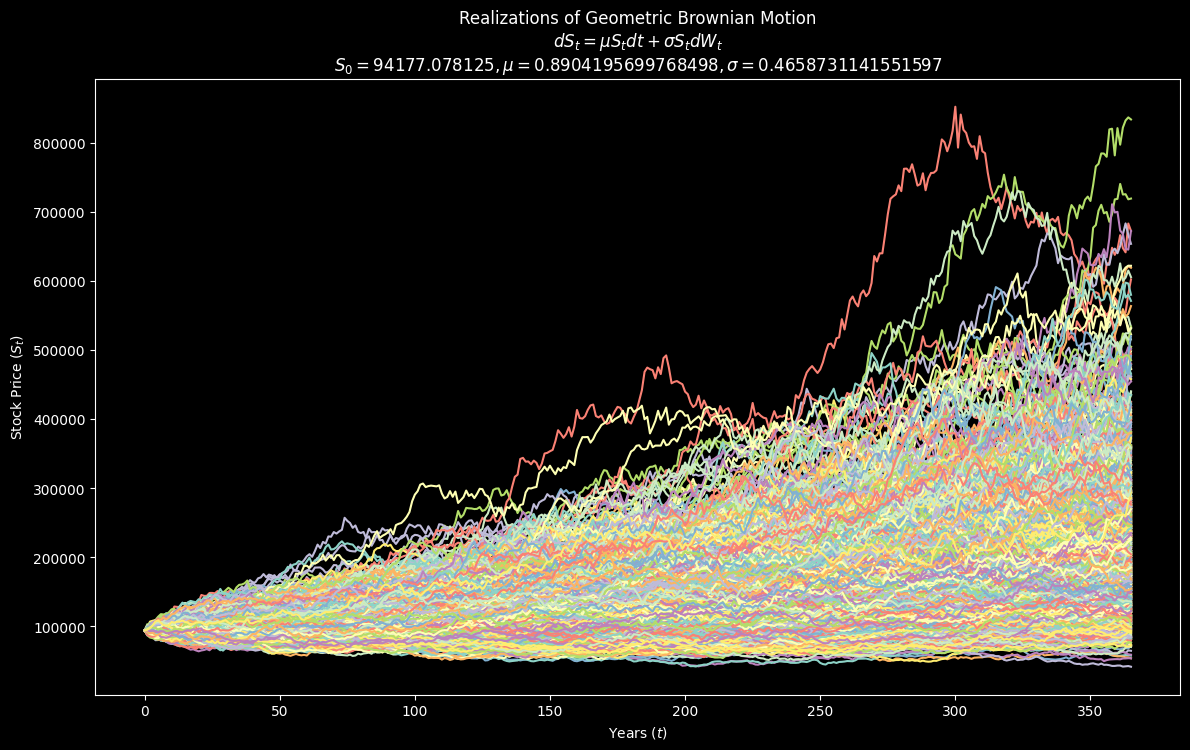

In [86]:
plt.style.use('dark_background')
plt.figure(figsize=(14, 8))
plt.plot( St)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    f"Realizations of Geometric Brownian Motion\n"
    f"$dS_t = \mu S_t dt + \sigma S_t dW_t$\n"
    f"$S_0 = {S0}, \mu = {mu}, \sigma = {sigma}$"
)
plt.show()

In [87]:
# Precios finales de todas las simulaciones
precios_finales = St[69, :]

# Retorno promedio anualizado
retorno_promedio = np.mean(precios_finales) / S0 - 1
retorno_anualizado = (1 + retorno_promedio)**(1/T) - 1

# Volatilidad (riesgo)
volatilidad = np.std(precios_finales) / S0

# Ratio de Sharpe (retorno/riesgo)
sharpe_ratio = retorno_anualizado / volatilidad

print(f"Retorno esperado: {retorno_anualizado:.2%}")
print(f"Volatilidad: {volatilidad:.2%}") 
print(f"Ratio de Sharpe: {sharpe_ratio:.2f}")
# Calcular pérdidas
perdidas = S0 - precios_finales

# VaR al 95% de confianza (pérdida que no se supera el 95% del tiempo)
VaR_95 = np.percentile(perdidas, 95)
CVaR_95 = np.mean(perdidas[perdidas >= VaR_95])  # Pérdida promedio en el peor 5%

# VaR al 95% de confianza (pérdida que no se supera el 95% del tiempo)
VaR_95_per = VaR_95/S0
CVaR_95_per = CVaR_95/S0  # Pérdida promedio en el peor 5%

print(f"VaR 95%: ${VaR_95:.2f} (Pérdida máxima en 95% de casos)")
print(f"CVaR 95%: ${CVaR_95:.2f} (Pérdida promedio en el peor 5%)")
print(f"VaR 95%: {VaR_95_per:.2%} (Pérdida máxima en 95% de casos en porcentaje)")
print(f"CVaR 95%: {CVaR_95_per:.2%} (Pérdida promedio en el peor 5% en porcentaje)")

Retorno esperado: 6.89%
Volatilidad: 24.29%
Ratio de Sharpe: 0.28
VaR 95%: $16089.25 (Pérdida máxima en 95% de casos)
CVaR 95%: $21640.97 (Pérdida promedio en el peor 5%)
VaR 95%: 17.08% (Pérdida máxima en 95% de casos en porcentaje)
CVaR 95%: 22.98% (Pérdida promedio en el peor 5% en porcentaje)


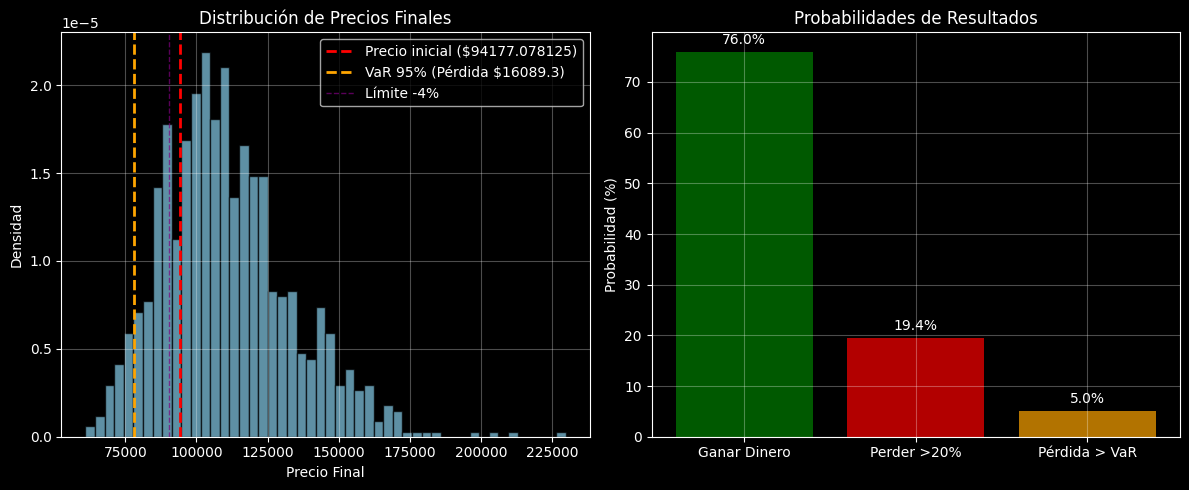

RESUMEN:
VaR 95%: $16089.25 (Pérdida máxima en 95% de casos)
Probabilidad de ganar: 76.0%
Probabilidad de perder >4%: 19.4%


In [88]:
# Calcular métricas con tu St
precios_finales = St[69, :]  # Precios al final del periodo
VaR_95 = np.percentile(S0 - precios_finales, 95)
prob_ganar = np.mean(precios_finales > S0) * 100
prob_perder_4 = np.mean(precios_finales < 0.96 * S0) * 100

# Crear gráfico
plt.figure(figsize=(12, 5))

# Gráfico 1: Distribución de precios finales
plt.subplot(1, 2, 1)
plt.hist(precios_finales, bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
plt.axvline(S0, color='red', linestyle='--', linewidth=2, label=f'Precio inicial (${S0})')
plt.axvline(S0 - VaR_95, color='orange', linestyle='--', linewidth=2, 
            label=f'VaR 95% (Pérdida ${VaR_95:.1f})')
plt.axvline(0.96 * S0, color='purple', linestyle='--', linewidth=1, 
            label='Límite -4%', alpha=0.7)
plt.xlabel('Precio Final')
plt.ylabel('Densidad')
plt.title('Distribución de Precios Finales')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Probabilidades
plt.subplot(1, 2, 2)
categorias = ['Ganar Dinero', 'Perder >20%', 'Pérdida > VaR']
probabilidades = [prob_ganar, prob_perder_4, 5]  # VaR 96% = 4% de casos
colores = ['green', 'red', 'orange']

bars = plt.bar(categorias, probabilidades, color=colores, alpha=0.7)
plt.ylabel('Probabilidad (%)')
plt.title('Probabilidades de Resultados')
plt.grid(True, alpha=0.3)

# Añadir valores en las barras
for bar, prob in zip(bars, probabilidades):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{prob:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"RESUMEN:")
print(f"VaR 95%: ${VaR_95:.2f} (Pérdida máxima en 95% de casos)")
print(f"Probabilidad de ganar: {prob_ganar:.1f}%")
print(f"Probabilidad de perder >4%: {prob_perder_4:.1f}%")